In [36]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa 
from tesser import plot_models
import numpy as np
import importlib

data_dir = '/home/rodrigo/Dropbox/tesser_successor/Data/'
subject = 102

In [37]:
# load structure learning and induction data for one subject
df_struct = util.load_struct(data_dir, subject)
df_induct = util.load_induction(data_dir, subject)

In [75]:
# estimate parameters for this subject
t, a, g, l = [],[],[],[]
for tau in np.arange(0, 1, .1):
    t.append(tau)
    alpha, gamma = fit.maximize_likelihood(df_struct, df_induct,'differential evolution',tau)
    a.append(alpha)
    g.append(gamma)
#     print(f'parameters for subject {subject}: alpha={alpha:.2f}, gamma={gamma:.2f},tau={tau:.2f}')
    log_prob, prob_vector = fit.get_log_likelihood(df_struct, df_induct, gamma, alpha,tau, True)
    l.append(log_prob)

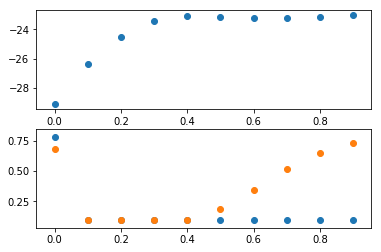

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1)
ax[0].scatter(t,l)
ax[1].scatter(t, a)
ax[1].scatter(t,g)
plt.show()

In [83]:

for tau in np.arange(0, 1.1, .1):
    alpha, gamma = fit.maximize_likelihood(df_struct, df_induct,'differential evolution',tau)
    log_prob, trial_prob = fit.get_log_likelihood(df_struct, df_induct, gamma, alpha,tau, True)
    df = df_induct
    df['trial_prob']= trial_prob
    count = 0
    for i in range(len(trial_prob)):
        x = df['trial_prob'][i]
        y = df['Acc'][i]
        if x > 0.5 and y == 1:
            count += 1
        if x < 0.5 and y == 0:
            count += 1
    success_rate = count/len(trial_prob)
    print(f'parameters for subject {subject}: alpha={alpha:.2f}, gamma={gamma:.2f},tau={tau:.2f},success_rate={success_rate:.2f},log_prob={log_prob:.2f}')

parameters for subject 102: alpha=0.10, gamma=0.24,tau=0.00,success_rate=0.00
parameters for subject 102: alpha=0.10, gamma=0.10,tau=0.10,success_rate=0.83
parameters for subject 102: alpha=0.10, gamma=0.10,tau=0.20,success_rate=0.83
parameters for subject 102: alpha=0.10, gamma=0.10,tau=0.30,success_rate=0.83
parameters for subject 102: alpha=0.10, gamma=0.10,tau=0.40,success_rate=0.83
parameters for subject 102: alpha=0.10, gamma=0.19,tau=0.50,success_rate=0.86
parameters for subject 102: alpha=0.10, gamma=0.35,tau=0.60,success_rate=0.88
parameters for subject 102: alpha=0.10, gamma=0.52,tau=0.70,success_rate=0.93
parameters for subject 102: alpha=0.10, gamma=0.65,tau=0.80,success_rate=0.93
parameters for subject 102: alpha=0.10, gamma=0.73,tau=0.90,success_rate=0.93
parameters for subject 102: alpha=0.10, gamma=0.78,tau=1.00,success_rate=0.93


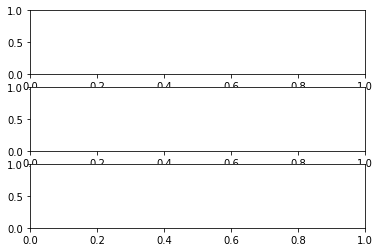

In [116]:
# fig, ax = plt.subplots(3, 1)
t, a, g, l = [],[],[],[]
index = 0
z = np.zeros((1331,4))
for tau in np.arange(0, 1.1, .1):
    for alpha in np.arange(0, 1.1, .1):
        for gamma in np.arange(0, 1.1, .1):
                log_likelihood = fit.get_log_likelihood(df_struct, df_induct, gamma, alpha,tau)
#                 print(f'parameters for subject {subject}: alpha={alpha:.2f}, gamma={gamma:.2f},tau={tau:.2f},log_likelihood={log_likelihood:.2f}')
                t.append(tau)
                a.append(alpha)
                g.append(gamma)
                l.append(log_likelihood)
                z[index]=[tau, alpha, gamma, log_likelihood]
                index+=1
                
#     ax[0].scatter(t,l)
#     ax[1].scatter(t, a)
#     ax[2].scatter(t,g)
#     plt.show()


In [136]:

import pandas as pd
data=pd.DataFrame(z, columns=['t', 'a', 'g', 'l'])
data

data.l.max()
data.iloc[data.l.idxmax(axis=0)]

t     1.000000
a     0.100000
g     0.800000
l   -22.958515
Name: 1229, dtype: float64

In [140]:
alpha, gamma = fit.maximize_likelihood(df_struct, df_induct, 'differential evolution',1)
alpha, gamma 

(0.1, 0.778726070494288)

In [144]:
log_prob , trial_prob = fit.get_log_likelihood(df_struct, df_induct, alpha, gamma ,1, True)
df_induct['trial_prob']= trial_prob

In [145]:
print(log_prob)
df_induct
df_induct.groupby('QuestType').mean()

-83.60431140516006


,SubjNum,TrialNum,CueNum,Opt1Num,Opt2Num,Resp,Acc,RT,prob,trial_prob
QuestType,,,,,,,,,,
Bound1,102.0,27.166667,10.5,10.666667,10.5,1.666667,0.833333,4.361324,0.185329,0.185331
Bound2,102.0,17.666667,10.5,8.500000,15.5,1.500000,0.666667,2.998186,0.219285,0.219287
Prim,102.0,21.133333,11.2,10.800000,11.6,1.433333,0.866667,2.839950,0.728932,0.728929


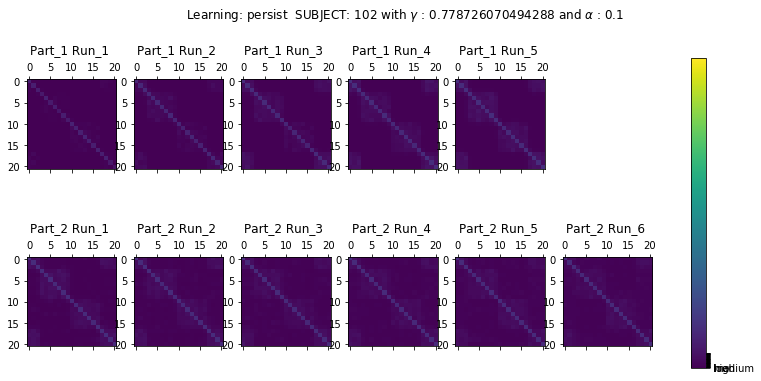

In [143]:
# plot the SR matrix after each run
M = sr.learn_sr(df_struct, gamma, alpha)
plot_models.plot_explore_runs(M, subject, 'persist', gamma, alpha, vmax=10)